In [1]:
import warnings
warnings.filterwarnings("ignore")

from mlzero.utils.data import shuffle
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier as RandomForestClassifierSklearn
from sklearn.ensemble import RandomForestRegressor as RandomForestRegressorSklearn


from mlzero.supervised_learning.random_forest import RandomForestClassifier, RandomForestRegressor

# Random Forest Classifier

In [2]:
# import some data to play with
iris_dataset = datasets.load_iris()

# take the first two features. We could avoid this by using a two-dim dataset
X = iris_dataset.data[:100, :2]
y = iris_dataset.target[:100]

X, y = shuffle(X, y)

# create a mesh of points from min to max along X,Y axis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

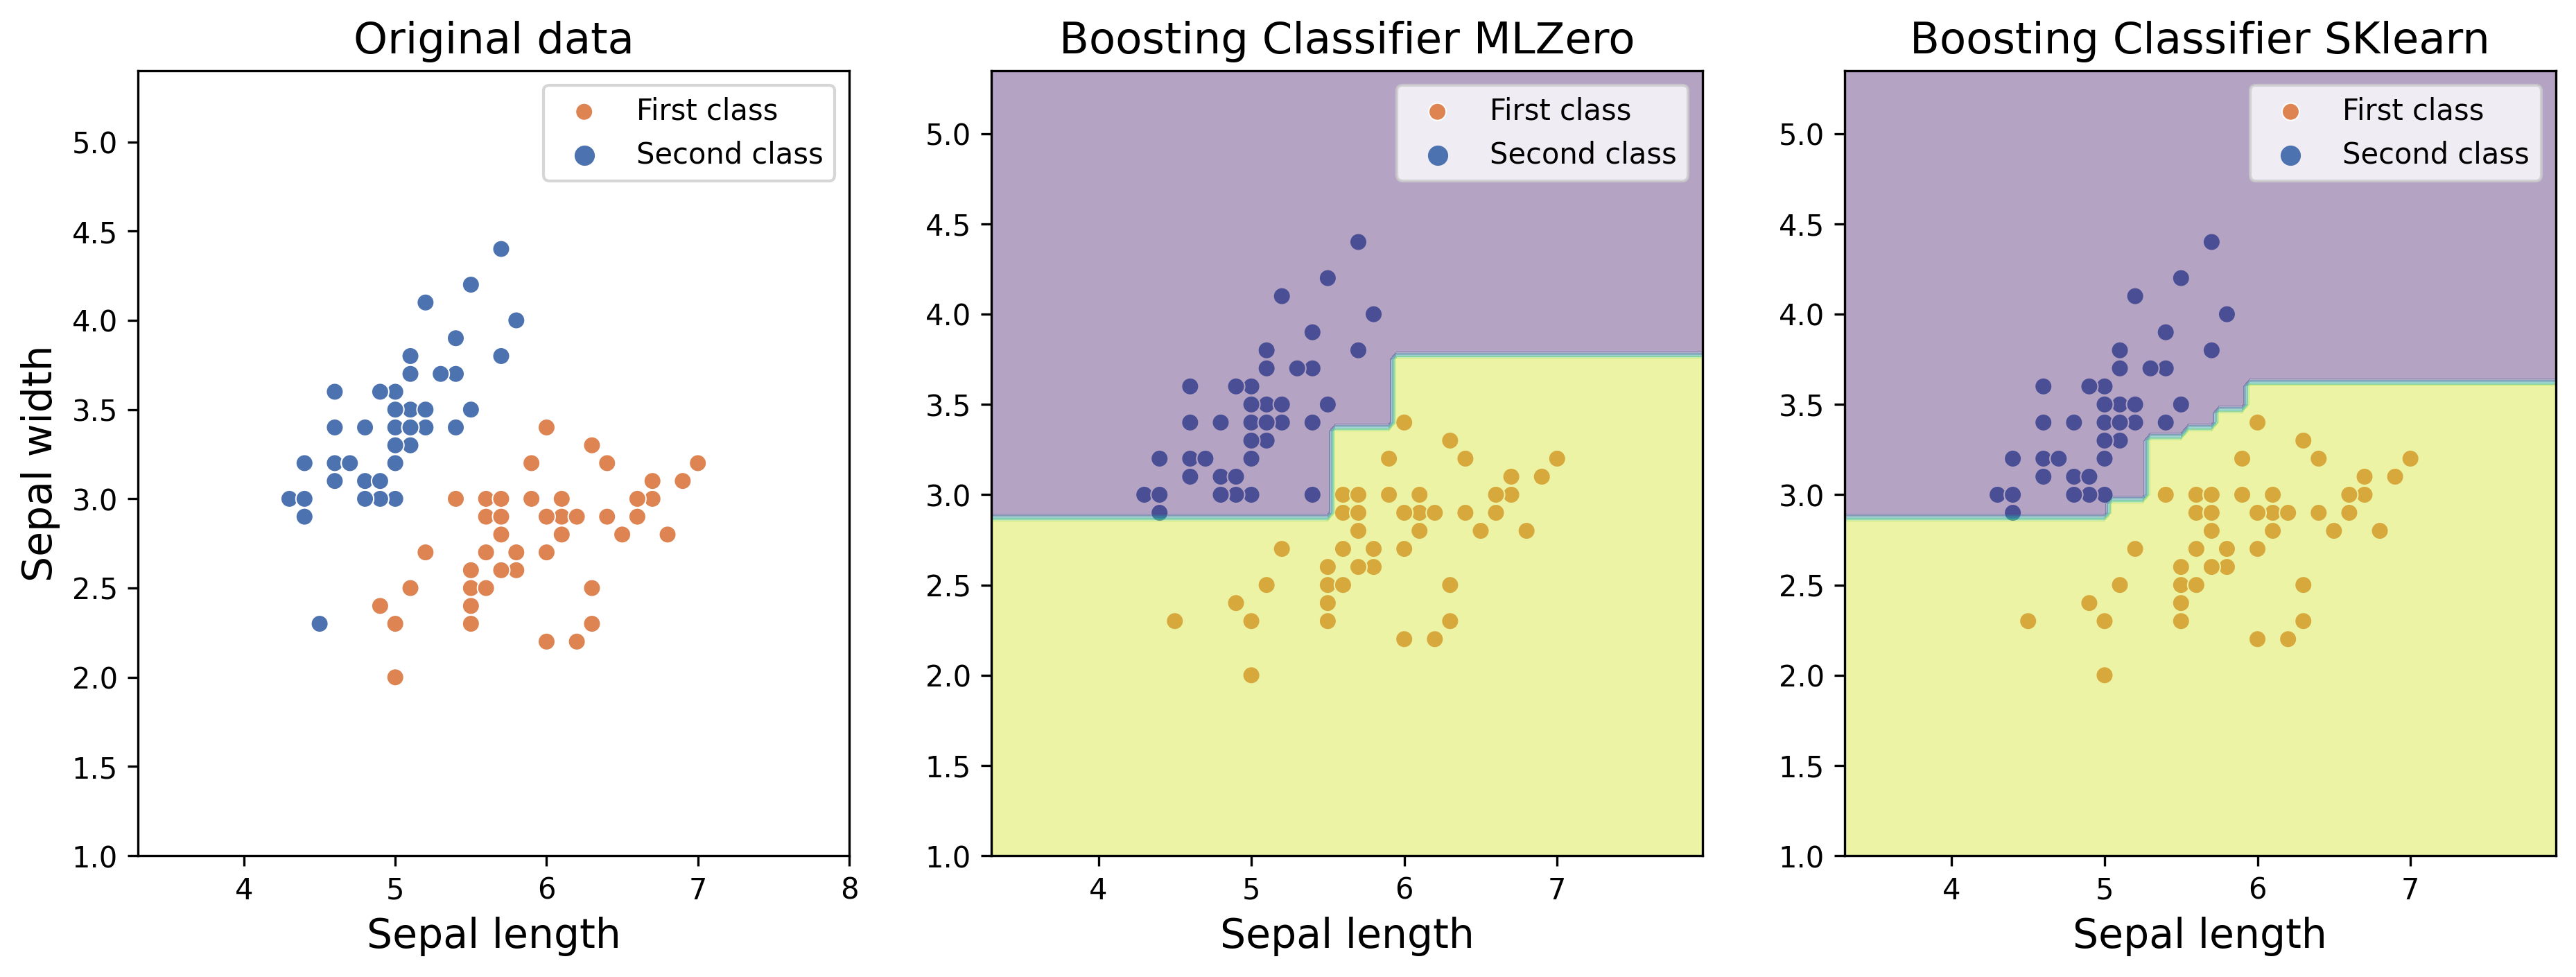

In [4]:
decision_tree_parameters = {'max_depth': 3, 'min_samples_split': 2}

model_mlzero = RandomForestClassifier(n_estimators = 3, tree_parameters = decision_tree_parameters)
                                         
model_sklearn = RandomForestClassifierSklearn(n_estimators = 3, **decision_tree_parameters)


model_mlzero.fit(X, y)
model_sklearn.fit(X, y)


plt.figure(figsize = (15, 5), dpi = 300)

# ----- Original data ----- #

plt.subplot(1, 3, 1)
plt.title('Original data', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette="deep")
ax.set_xlabel('Sepal length', fontsize = 14)
ax.set_ylabel('Sepal width', fontsize = 14)
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
plt.legend(['First class', 'Second class'])

# # ----- Boosting Classifier MLZero ----- #

plt.subplot(1, 3, 2)
plt.title('Boosting Classifier MLZero', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_mlzero.predict(X), palette="deep")

# plot decision boundaries
Z = model_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])


# ----- Boosting Classifier Sklearn ----- #

plt.subplot(1, 3, 3)
plt.title('Boosting Classifier SKlearn', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_sklearn.predict(X), palette="deep")

#plot decision boundaries
Z = model_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class']);

# Random Forest Regressor

In [5]:
X = np.arange(-10, 10, 0.1)

y = np.sin(X) + np.random.rand(len(X)) # just added a bit of noise

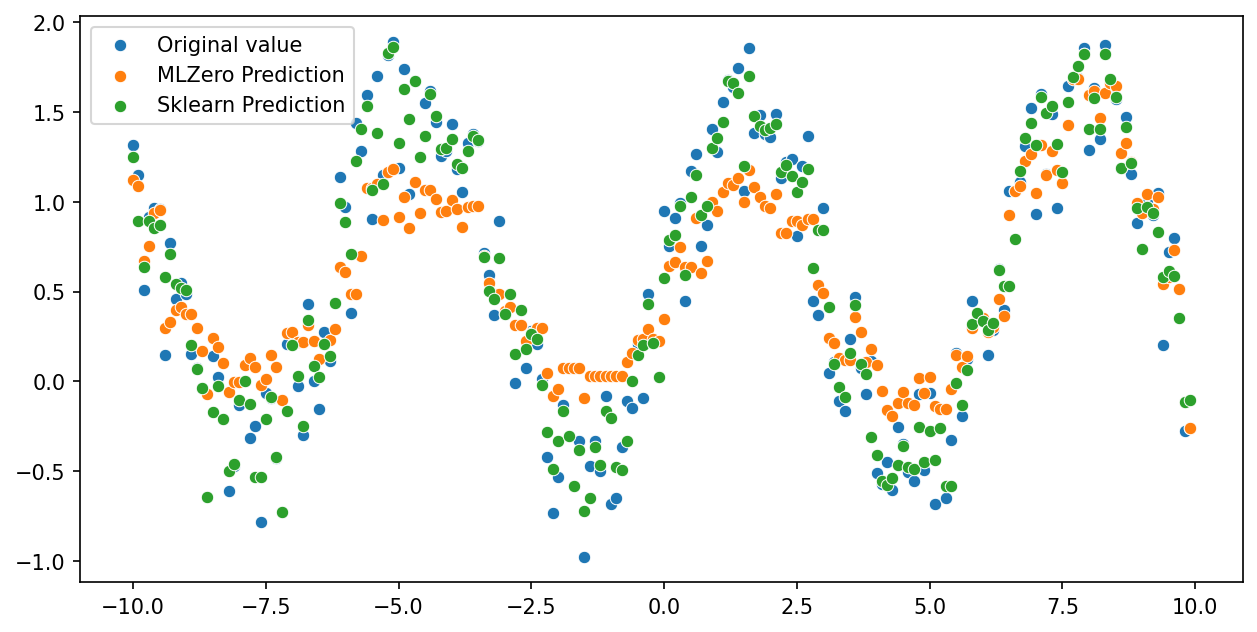

In [7]:
decision_tree_parameters = {'max_depth': 50, 'min_samples_split': 2}

model_mlzero = RandomForestRegressor(n_estimators = 5, tree_parameters = decision_tree_parameters)

model_sklearn = RandomForestRegressorSklearn(n_estimators = 5, **decision_tree_parameters)

model_mlzero.fit(np.reshape(X, (len(X), 1)), y)
model_sklearn.fit(np.reshape(X, (len(X), 1)), y)


mlzero_predictions = model_mlzero.predict(np.reshape(X, (len(X), 1)))
sklearn_predictions = model_sklearn.predict(np.reshape(X, (len(X), 1)))

plt.figure(figsize = (10, 5), dpi = 150)
ax = sns.scatterplot(X, y, label = 'Original value')
sns.scatterplot(X, mlzero_predictions, label = 'MLZero Prediction')
sns.scatterplot(X, sklearn_predictions, label = 'Sklearn Prediction');